### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)
import datetime
import statistics as stats
import re

### **-->Lab: cleaning categorical data<--**
- *modified: Effective To Date not dropped*
- *task 5 of this lab is the same as task 2 of the next, thus the cells associated with it were moved further down the script*

### 2. Importing data

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,Urban,Married,93,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


### 3. Dealing with column Customer

In [3]:
# this column is of no use for analysis purposes and so will be dropped

customer_df = customer_df.drop('Customer', axis = 1)

### 4. Separating numerical from categorical variables

In [4]:
customer_df.dtypes

State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [5]:
# Effective to Date will also be dropped as even with the correct datatype for its data, it is of no use for analysis purposes

# customer_df = customer_df.drop('Effective To Date', axis = 1)

In [6]:
cols = [col.replace(' ', '_').lower() for col in customer_df.columns]
customer_df.columns = cols

In [7]:
numerical_df = customer_df.select_dtypes(include = np.number)
categorical_df = customer_df.select_dtypes(include = np.object)

### 6. Checking if categoricals need cleaning

In [8]:
#checking for NaNs
categorical_df.isna().sum()

#there are none

state                0
response             0
coverage             0
education            0
effective_to_date    0
employmentstatus     0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

In [9]:
# checking for white-spaces
for column in categorical_df.columns:
    s = categorical_df.iloc[:,0]
    print(column, s.str.isspace().sum())

# no white-spaces

state 0
response 0
coverage 0
education 0
effective_to_date 0
employmentstatus 0
gender 0
location_code 0
marital_status 0
policy_type 0
policy 0
renew_offer_type 0
sales_channel 0
vehicle_class 0
vehicle_size 0


In [10]:
#value_counts for each column
for column in categorical_df.columns:
    print(categorical_df[column].value_counts(), "\n")

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64 

No     7826
Yes    1308
Name: response, dtype: int64 

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64 

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64 

1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/11    153
1/14/11    152
2/11/11    151
1/7/11     151
1/25/11    151
2/25/11    149
1/8/11     149
2/18/11    149
2/2/11  

#### Information extracted by value_counts() can be used to either point to NaNs and/or white-spaces or to produce information about the count of records for each category of a feature. In the last case, it is then possible to decide based on the value counts whether a category is underrepresented and if so how to group the last ones together to make up a category that would be comparable to the bigger ones.

In [11]:
# state: states with < 1000 customers in a separate category
## Xisca's solution
vals = pd.DataFrame(categorical_df['state'].value_counts())
vals = vals.reset_index()
vals.columns = ['state', 'counts']
group_states_df = vals[vals['counts']<1000]
group_states = list(group_states_df['state'])
group_states

['Nevada', 'Washington']

In [12]:
def clean_state(x):
    if x in group_states:
        return 'other'
    else:
        return x

categorical_df['state'] = list(map(clean_state, categorical_df['state']))
categorical_df.state.value_counts()

California    3150
Oregon        2601
Arizona       1703
other         1680
Name: state, dtype: int64

In [13]:
# response: only 2 categories
# coverage: only 3 categories, Premium would be other in the abovementioned solution

# education: categories with < 1000 customers in separate category
vals = pd.DataFrame(categorical_df['education'].value_counts())
vals = vals.reset_index()
vals.columns = ['education', 'counts']
group_education_df = vals[vals['counts']<1000]
group_education = list(group_education_df['education'])

def clean_education(x):
    if x in group_education:
        return 'other'
    else:
        return x

categorical_df['education'] = list(map(clean_education, categorical_df['education']))
categorical_df.education.value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
other                   1083
Name: education, dtype: int64

In [14]:
# employmentstatus: same as above
vals = pd.DataFrame(categorical_df['employmentstatus'].value_counts())
vals = vals.reset_index()
vals.columns = ['employmentstatus', 'counts']
group_es_df = vals[vals['counts']<1000]
group_es = list(group_es_df['employmentstatus'])

def clean_es(x):
    if x in group_es:
        return 'other'
    else:
        return x

categorical_df['employmentstatus'] = list(map(clean_es, categorical_df['employmentstatus']))
categorical_df.employmentstatus.value_counts()

Employed      5698
Unemployed    2317
other         1119
Name: employmentstatus, dtype: int64

In [15]:
# gender: only 2 variables
# location_code: only 3 variables, same as with coverage
# marital_status: same as above
# policy_type: same as above

# policy: separate category for < 1000
vals = pd.DataFrame(categorical_df['policy'].value_counts())
vals = vals.reset_index()
vals.columns = ['policy', 'counts']
group_policy_df = vals[vals['counts']<1000]
group_policy = list(group_policy_df['policy'])

def clean_policy(x):
    if x in group_policy:
        return 'other'
    else:
        return x

categorical_df['policy'] = list(map(clean_policy, categorical_df['policy']))
categorical_df.policy.value_counts()

Personal L3     3426
Personal L2     2122
other           1332
Personal L1     1240
Corporate L3    1014
Name: policy, dtype: int64

In [16]:
# renew_offer_type, sales_channel: no need for changes
# vehicle_class: <1000 in separate category

vals = pd.DataFrame(categorical_df['vehicle_class'].value_counts())
vals = vals.reset_index()
vals.columns = ['vehicle_class', 'counts']
group_vc_df = vals[vals['counts']<1000]
group_vc = list(group_vc_df['vehicle_class'])

def clean_vc(x):
    if x in group_vc:
        return 'other'
    else:
        return x

categorical_df['vehicle_class'] = list(map(clean_vc, categorical_df['vehicle_class']))
categorical_df.vehicle_class.value_counts()

# vehicle_size: no need for changes

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
other             831
Name: vehicle_class, dtype: int64

## **-->Lab: feature extraction<--**

### 1. Opening categoricals variable

In [17]:
categorical_df = customer_df.select_dtypes(include = np.object)
categorical_df.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 2. Plotting categoricals

In [18]:
# checking to see how many subplots must be generated

len(categorical_df.columns)

15

#### Visualisation of data:
- using boxplots

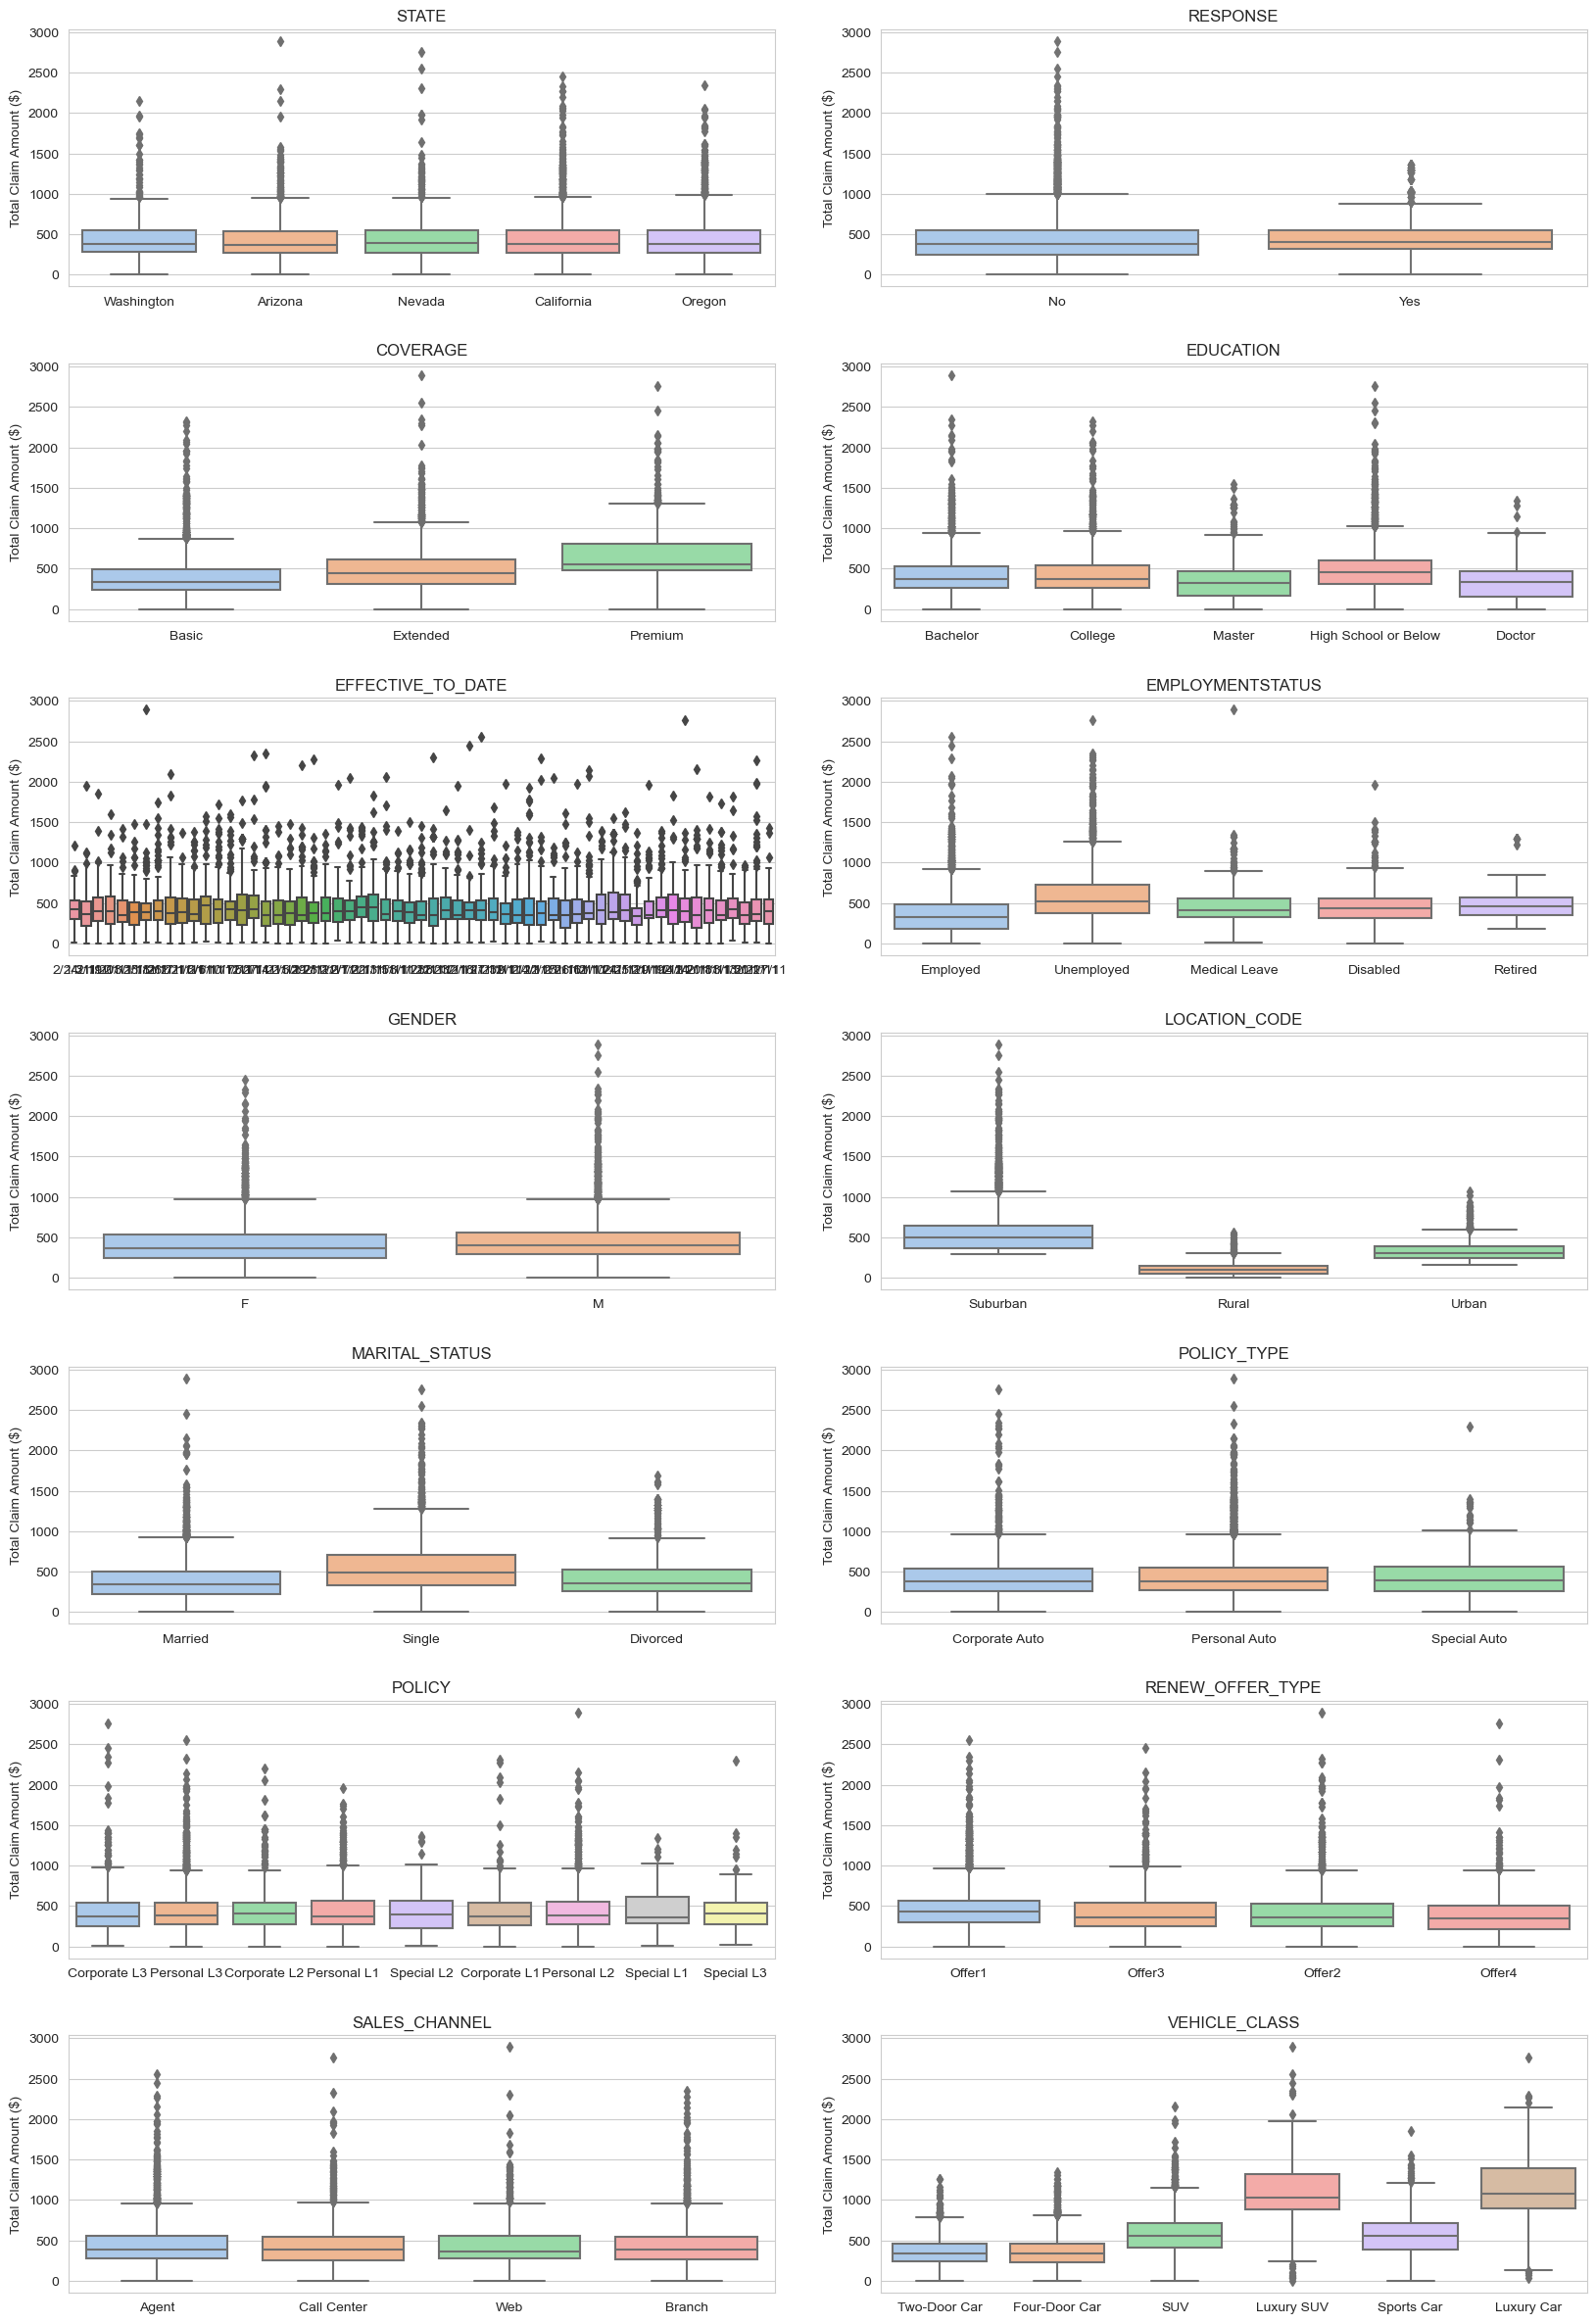

In [19]:
# the target is the variable total_claim_amount

fig, axes = plt.subplots(7,2, figsize = (20,30))
plt.subplots_adjust(wspace = 0.15, hspace=0.3)

for col, ax in zip(categorical_df.columns, axes.flat):
    with sns.color_palette('pastel'):   # assigning different colours from a specific palette to the separate columns. limit of pastel palette: 10 colours
        sns.boxplot(x = categorical_df[col], y = numerical_df['total_claim_amount'], ax = ax).set(xlabel = '', ylabel = 'Total Claim Amount ($)', title = col.upper())
plt.show()

- using barplots

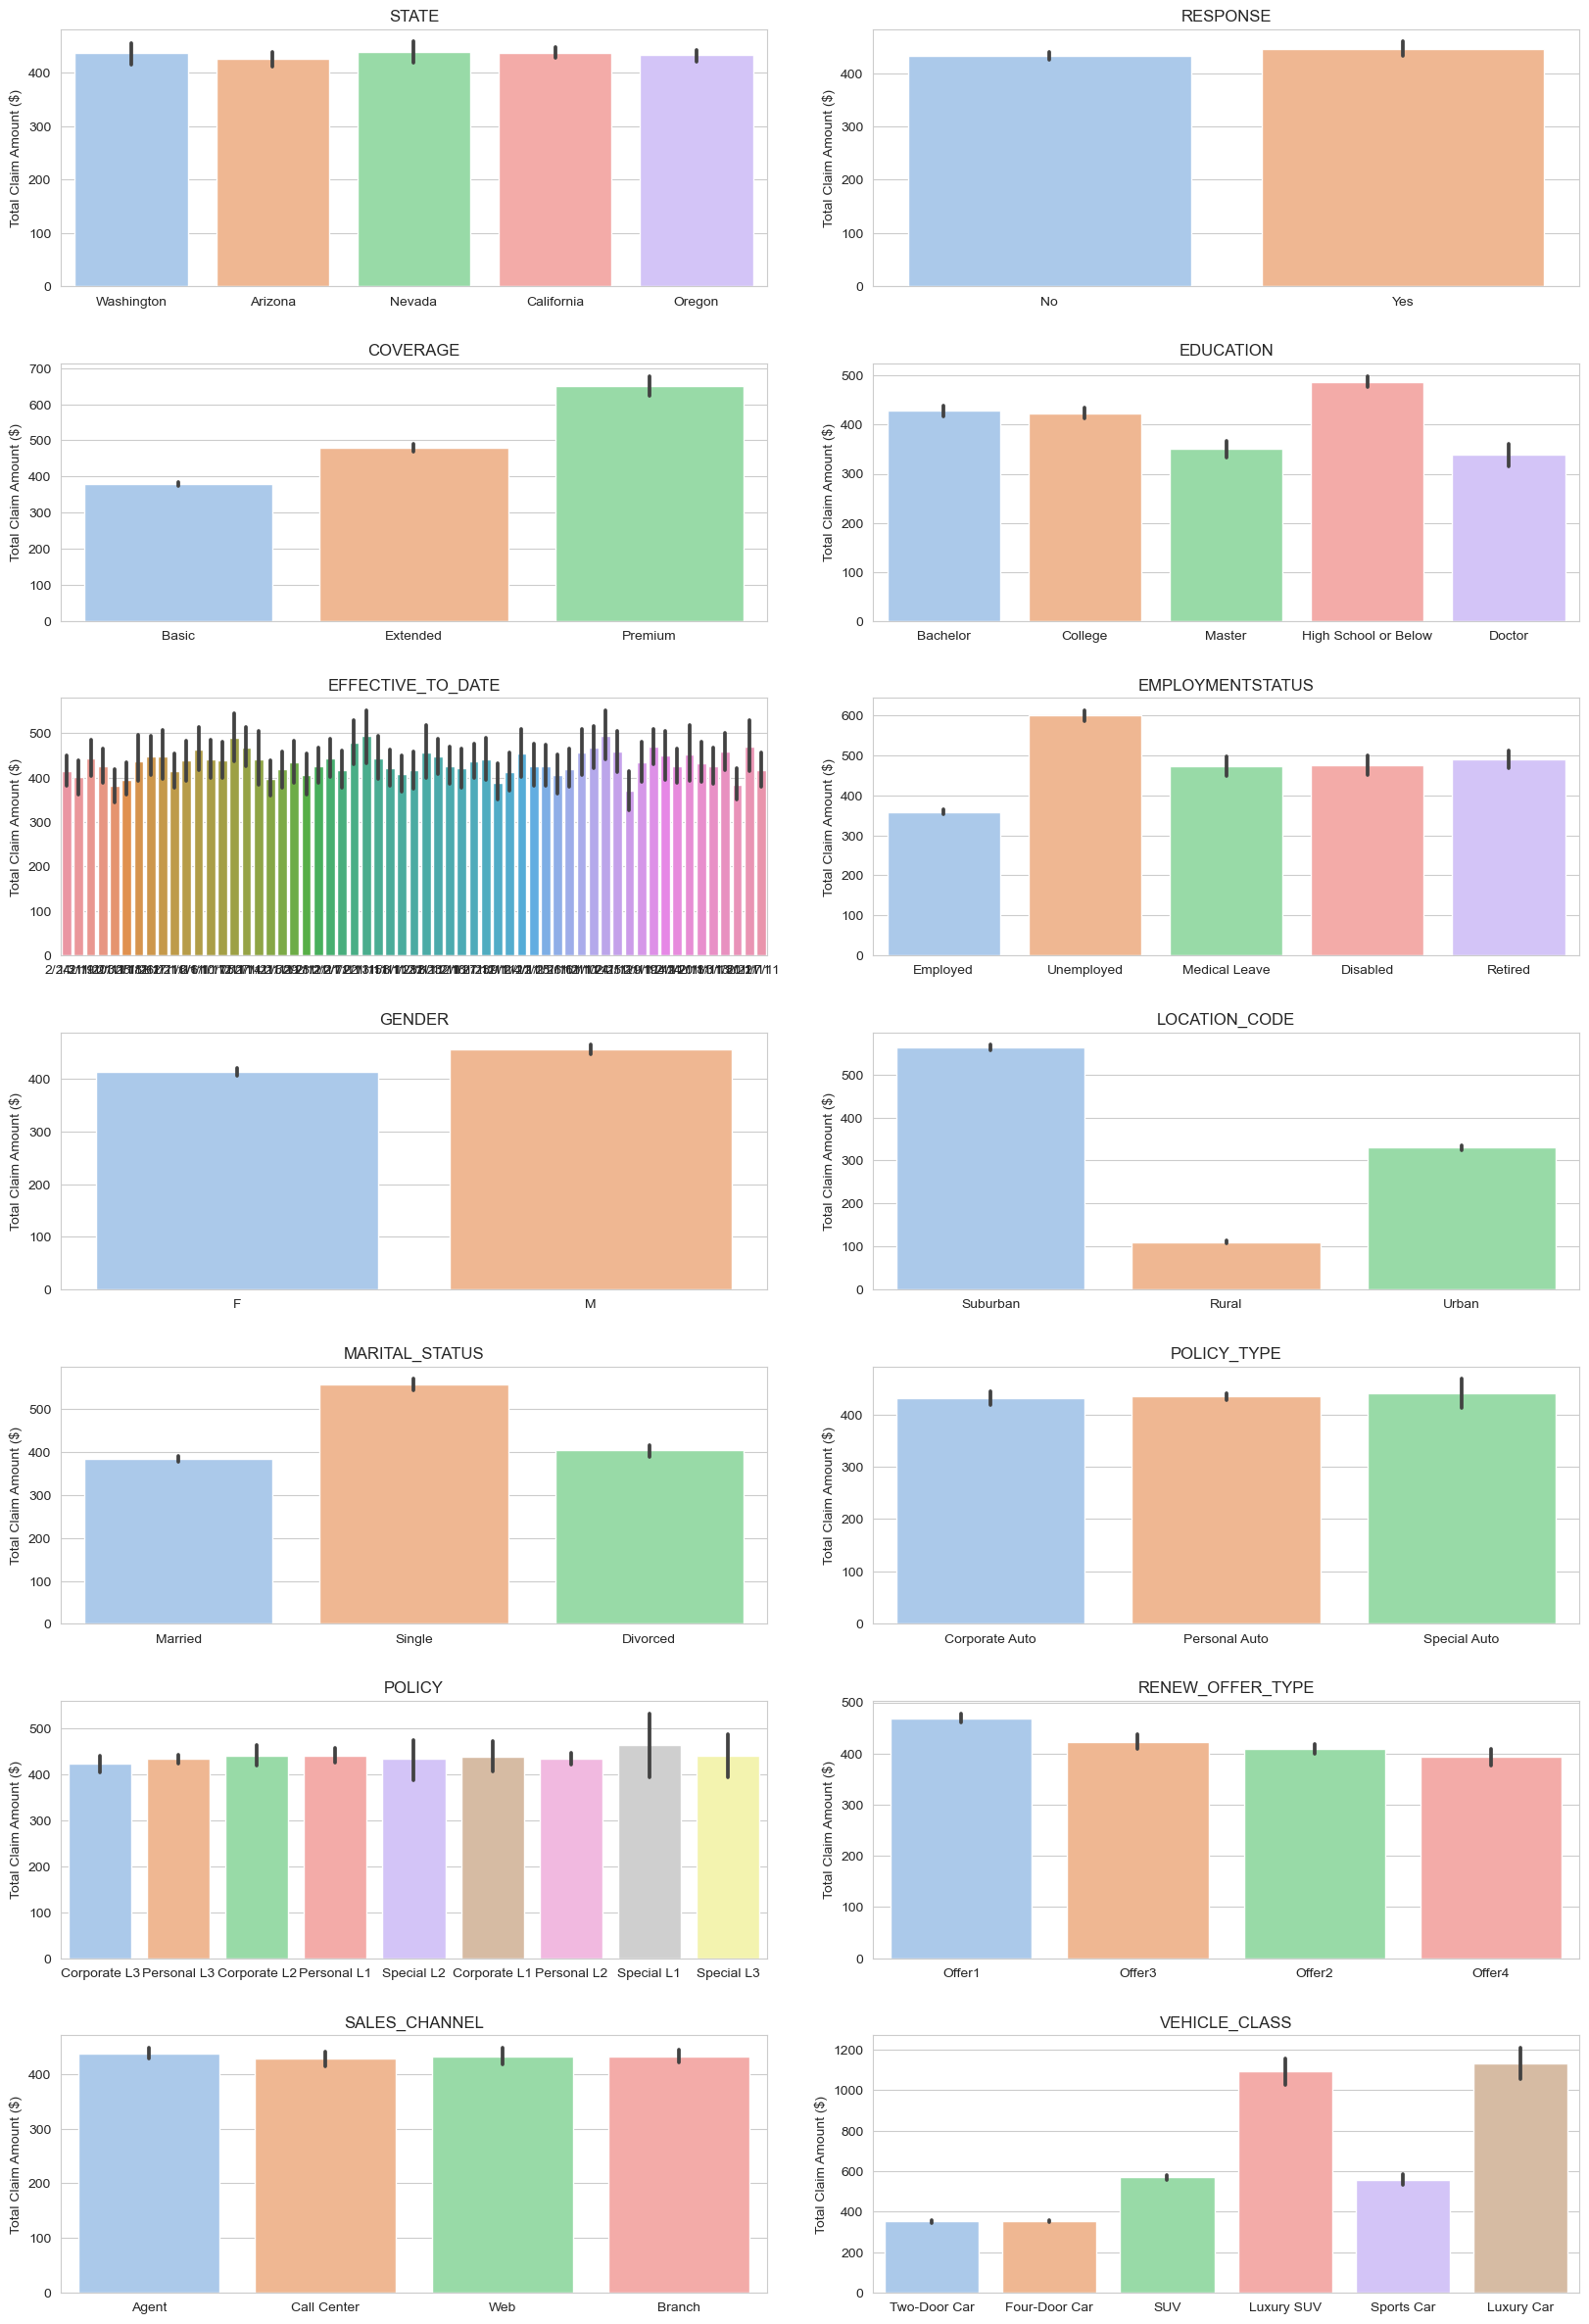

In [20]:
fig, axes = plt.subplots(7,2, figsize = (20,30))
plt.subplots_adjust(wspace = 0.15, hspace=0.3)

for col, ax in zip(categorical_df.columns, axes.flat):
    with sns.color_palette('pastel'):
        sns.barplot(x = categorical_df[col], y = numerical_df['total_claim_amount'], ax = ax).set(xlabel = '', ylabel = 'Total Claim Amount ($)', title = col.upper())
plt.show()

#### *Looking at both the boxplots and barplots:*
*- there is not much variation in y in the case of state and sales_channel, as shown both by barplots and boxplots. They can be dropped.*
*- policy_type appears to be the same. In addition, policy's 6 boxplots represent very similar distributions of values, not only among themselves, but also with those of policy_type. However, in the case of policy, there are 3 variables that offer a degree of differentiation, namely Personal L2, Special L2 and Special L1. Furthermore and as shown in previous labs, policy and policy_types are strongly correlated. Given these facts, it is safe to assume that even if policy_type, the one showing the lesser level of variation is removed from the dataframe, its categories would be represented in those of policy. policy_type is redundant and can be dropped.*

### 3. Checking values to decide fate of potentially redundant columns

In [21]:
# I need a method to extract metrics of a numerical variable per category of a categorical variable
customer_df.groupby('state')['total_claim_amount'].describe()[['min', 'mean', '50%', 'max']].round(2) # solution by @cs95 on Stackoverflow 

,min,mean,50%,max
state,,,,
Arizona,0.38,425.36,374.40,2893.24
California,0.42,437.82,386.10,2452.89
Nevada,0.10,438.75,388.75,2759.79
Oregon,0.52,433.01,386.03,2345.41
Washington,2.70,436.34,379.20,2145.60


In [22]:
# the mean and median of the target total_claim_amount are practically the same for all categories in their respective range of values
categorical_df = categorical_df.drop('state', axis = 1)

In [23]:
customer_df.groupby('sales_channel')['total_claim_amount'].describe()[['min', 'mean', '50%', 'max']].round(2)

,min,mean,50%,max
sales_channel,,,,
Agent,0.10,438.43,384.01,2552.34
Branch,0.52,432.87,388.80,2345.41
Call Center,0.38,428.12,384.00,2759.79
Web,0.89,433.00,366.28,2893.24


In [24]:
# same as above
categorical_df = categorical_df.drop('sales_channel', axis = 1)

In [25]:
customer_df.groupby('policy_type')['total_claim_amount'].describe()[['min', 'mean', '50%', 'max']].round(2)

,min,mean,50%,max
policy_type,,,,
Corporate Auto,0.10,430.31,384.00,2759.79
Personal Auto,0.38,434.83,383.17,2893.24
Special Auto,8.08,440.47,397.06,2294.63


In [26]:
# same as above
categorical_df = categorical_df.drop('policy_type', axis = 1)

# this feature was going to be checked for its potential redundancy in relation to policy

In [27]:
customer_df.groupby('policy')['total_claim_amount'].describe()[['min', 'mean', '50%', 'max']].round(2)

,min,mean,50%,max
policy,,,,
Corporate L1,0.10,437.79,374.02,2306.51
Corporate L2,1.33,439.18,407.68,2201.33
Corporate L3,3.20,422.46,370.51,2759.79
Personal L1,1.59,441.06,369.72,1961.16
Personal L2,0.42,433.76,384.00,2893.24
Personal L3,0.38,433.24,384.00,2552.34
Special L1,13.16,463.24,364.90,1336.93
Special L2,8.08,432.60,396.05,1361.99
Special L3,22.57,439.04,407.17,2294.63


In [28]:
# the table above confirms that suspicion and shows that only a very small variation can be observed among the separate categories of policy
### However in the case of policy:
# Corporate L2: median = 407.8, which is the highest of all categories,
# Special L1: from table greatest value for mean and lowest for median, from the boxplot very few and less widespread outliers compared to the rest categories
# Special L2 not particularly interesting based on the metrics above, but also with very few and closely positioned outliers
### --> policy will not be dropped

### 4. Plotting time variable

In [29]:
months_df = customer_df

In [30]:
# time variable = effective_to_date and it has to be turned to the correct data type before it can be used

customer_df['effective_to_date'] = customer_df['effective_to_date'].str.replace('/', '')
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'].astype(str), format = '%m%d%y')

In [31]:
customer_df['effective_to_date'].describe()

count                    9134
unique                     59
top       2011-01-10 00:00:00
freq                      195
first     2011-01-01 00:00:00
last      2011-12-09 00:00:00
Name: effective_to_date, dtype: object

In [32]:
min(customer_df.effective_to_date)

Timestamp('2011-01-01 00:00:00')

In [33]:
max(customer_df.effective_to_date)

Timestamp('2011-12-09 00:00:00')

*All dates are from the same year. They could be grouped by month*

In [34]:
by_month = customer_df.groupby(pd.Grouper(key='effective_to_date', freq='1M'))['total_claim_amount'].sum() # groupby each 1 month ## solution by Peter Mortensen on Stacheschange for same year
by_month.index = by_month.index.strftime('%B') # show name of month
by_month

effective_to_date
January      8.765711e+05
February     1.847824e+06
March        0.000000e+00
April        0.000000e+00
May          0.000000e+00
June         0.000000e+00
July         0.000000e+00
August       0.000000e+00
September    0.000000e+00
October      0.000000e+00
November     6.056142e+05
December     6.349576e+05
Name: total_claim_amount, dtype: float64

In [35]:
customer_df.groupby(customer_df.effective_to_date.dt.month)['total_claim_amount'].sum()

effective_to_date
1     8.765711e+05
2     1.847824e+06
11    6.056142e+05
12    6.349576e+05
Name: total_claim_amount, dtype: float64

#### According to these methods, it would seem that there were no claim amounts from March to October